In [72]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import glob
import utils
import matplotlib.colors as colors
import cmaps

# Read return files

In [73]:
datadir='/data/ghervieux/AFI'
method='GEV'
file=f'{datadir}/afi_return.fullUSA.gev.1980_2008_KS.nc'


In [74]:
yearb=file.split('.')[-2].split('_')[0]
yeare=file.split('.')[-2].split('_')[1]
print(yearb,yeare)

1980 2008


In [75]:
ds=xr.open_dataset(file)
units='degree-days ("°F")'

In [76]:
ds['return_afi']

<xarray.DataArray 'return_afi' (return_periods: 6, lat: 193, lon: 501)> Size: 5MB
[580158 values with dtype=float64]
Coordinates:
  * return_periods  (return_periods) int64 48B 2 5 10 25 50 100
  * lat             (lat) float64 2kB 72.0 71.75 71.5 71.25 ... 24.5 24.25 24.0
  * lon             (lon) float64 4kB 180.0 180.2 180.5 ... 304.5 304.8 305.0

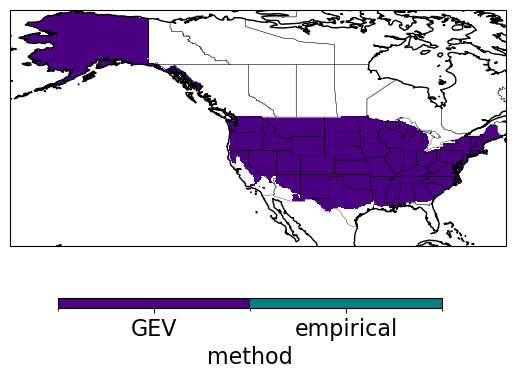

In [77]:
# choose a good projection for regional maps
levels=np.array([1,2,3])
pal_norm = colors.BoundaryNorm(np.array([1,2,3]),ncolors=3, clip = False)
cmap= colors.ListedColormap(['indigo','sienna', 'teal'])
proj=ccrs.PlateCarree()
#proj=ccrs.LambertConformal()
fig, ax = plt.subplots(nrows=1,ncols=1,subplot_kw={'projection':proj})
cc=ds['method'].plot.pcolormesh(ax=ax,cmap = cmap, levels=levels, transform=proj,add_colorbar=False)

state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='None')
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.25)
cbar_ax = fig.add_axes([0.2, 0.12, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=cbar_ax,orientation='horizontal',ticks=[1.5,2.5])
cbar.set_ticklabels(['GEV','empirical'],fontsize=14)
cbar.set_label(label=f'method',fontsize=16)
cbar.ax.tick_params(labelsize=16)
ax.set_extent([190,294,22,62])
ax.coastlines()

In [78]:
state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='None')

In [79]:
lon2d,lat2d=np.meshgrid(ds.lon,ds.lat)
idlat,idlon = np.where(ds['method']==2)

Text(0.5, 0.98, 'method: GEV, return period= 2\n 1980-2008')

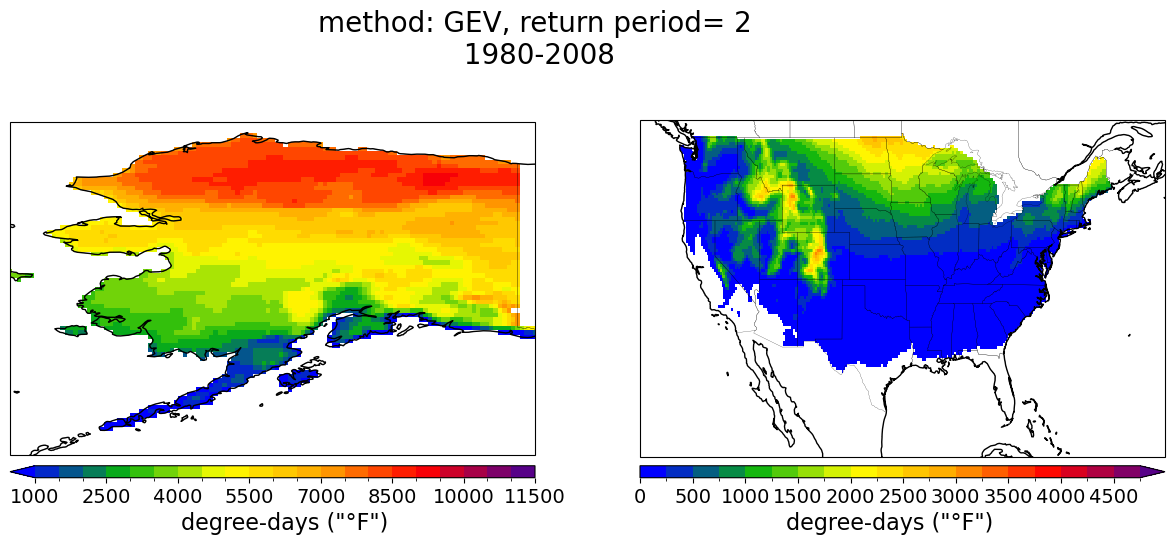

In [80]:
cmap=cmaps.BlGrYeOrReVi200
proj=ccrs.PlateCarree()

nperiod=2
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)
cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax[0],cmap=cmap,levels=np.arange(1000,12000,500),add_colorbar=False)
ax[0].scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.95,zorder=10)
p0 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax[0].set_extent([190,220,53,72],ccrs.PlateCarree())

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax[1],cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
ax[1].scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.95,zorder=10)
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax[1].set_extent([230,300,22,50.5],ccrs.PlateCarree())


asp = np.diff(ax[0].get_xlim())[0] / np.diff(ax[0].get_ylim())[0]
ax[1].set_aspect(asp)

for i in range(len(ax)):
  ax[i].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
  ax[i].coastlines()
  ax[i].set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}\n {yearb}-{yeare}',fontsize=20)  

Text(0.5, 0.98, 'method: GEV, return period= 2\n 1980-2008')

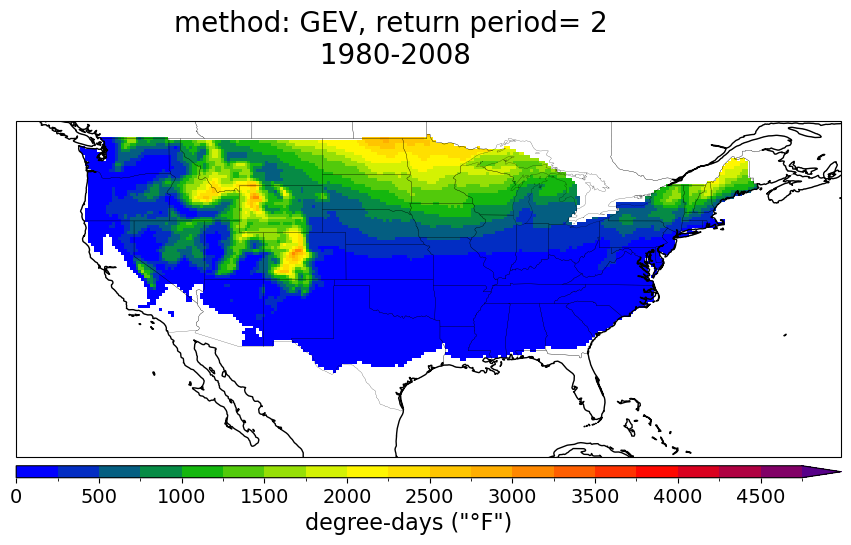

In [81]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)


cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax,cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
ax.scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.95,zorder=10)
p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax.set_extent([230,300,22,50.5],ccrs.PlateCarree())

ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
ax.coastlines()
ax.set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}\n {yearb}-{yeare}',fontsize=20)  

Text(0.5, 0.98, 'method: GEV, return period= 2\n 1980-2008')

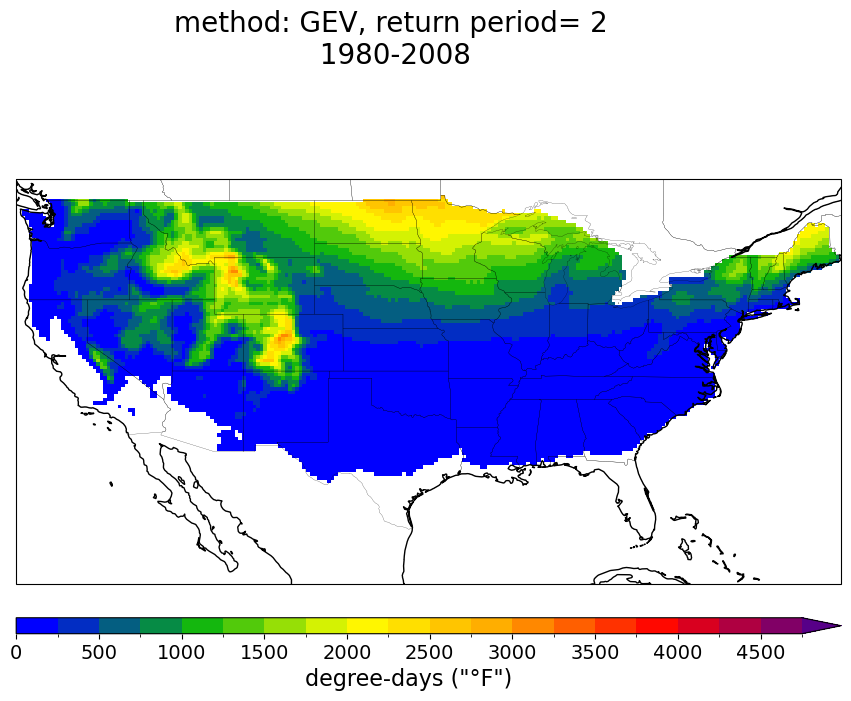

In [82]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax,cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)

p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax.set_extent([235,293,22,50.5],ccrs.PlateCarree())
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
ax.coastlines()
ax.set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}\n {yearb}-{yeare}',fontsize=20)  

Text(0.5, 0.98, 'method: GEV, return period= 50\n 1980-2008')

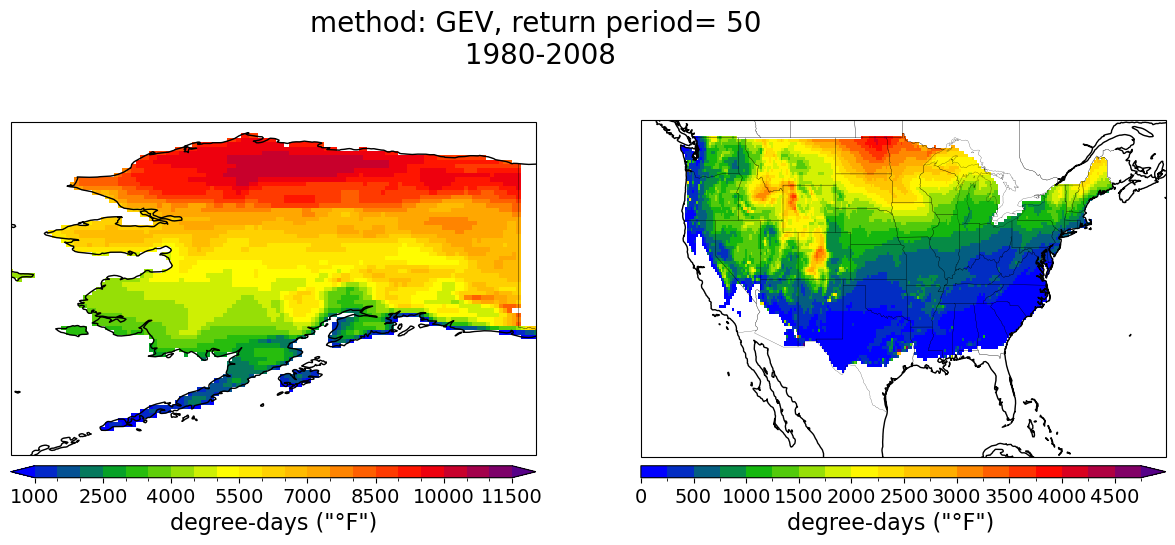

In [83]:
nperiod=50
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)
cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax[0],cmap=cmap,levels=np.arange(1000,12000,500),add_colorbar=False)
ax[0].scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.95,zorder=10)
p0 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax[0].set_extent([190,220,53,72],ccrs.PlateCarree())

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax[1],cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
ax[1].scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.95,zorder=10)
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax[1].set_extent([230,300,22,50.5],ccrs.PlateCarree())


asp = np.diff(ax[0].get_xlim())[0] / np.diff(ax[0].get_ylim())[0]
ax[1].set_aspect(asp)

for i in range(len(ax)):
  ax[i].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
  ax[i].coastlines()
  ax[i].set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}\n {yearb}-{yeare}',fontsize=20)  

Text(0.5, 0.98, 'method: GEV, return period= 50\n 1980-2008')

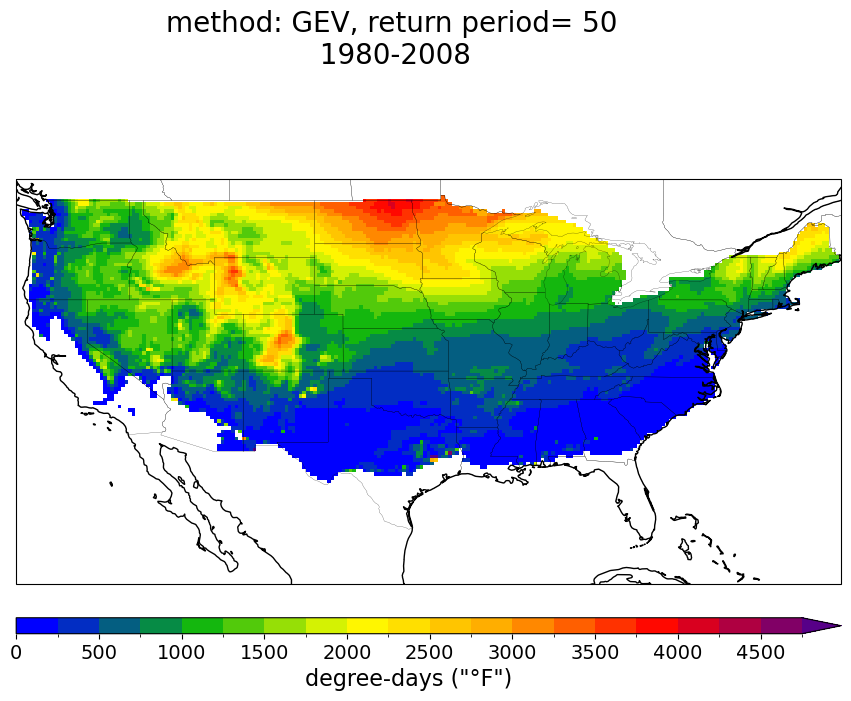

In [84]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax,cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
ax.scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.95,zorder=10)
p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax.set_extent([235,293,22,50.5],ccrs.PlateCarree())
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
ax.coastlines()
ax.set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}\n {yearb}-{yeare}',fontsize=20)  

Text(0.5, 0.98, 'method: GEV, return period= 50\n 1980-2008')

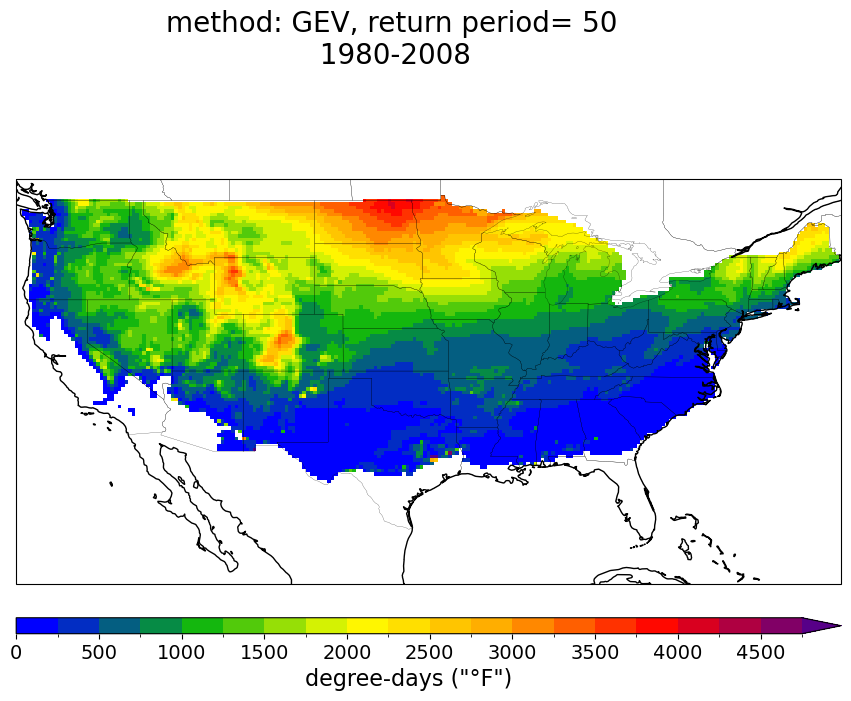

In [85]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax,cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)

p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax.set_extent([235,293,22,50.5],ccrs.PlateCarree())
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
ax.coastlines()
ax.set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}\n {yearb}-{yeare}',fontsize=20)  

Text(0.5, 0.98, 'method: GEV, return period= 100\n 1980-2008')

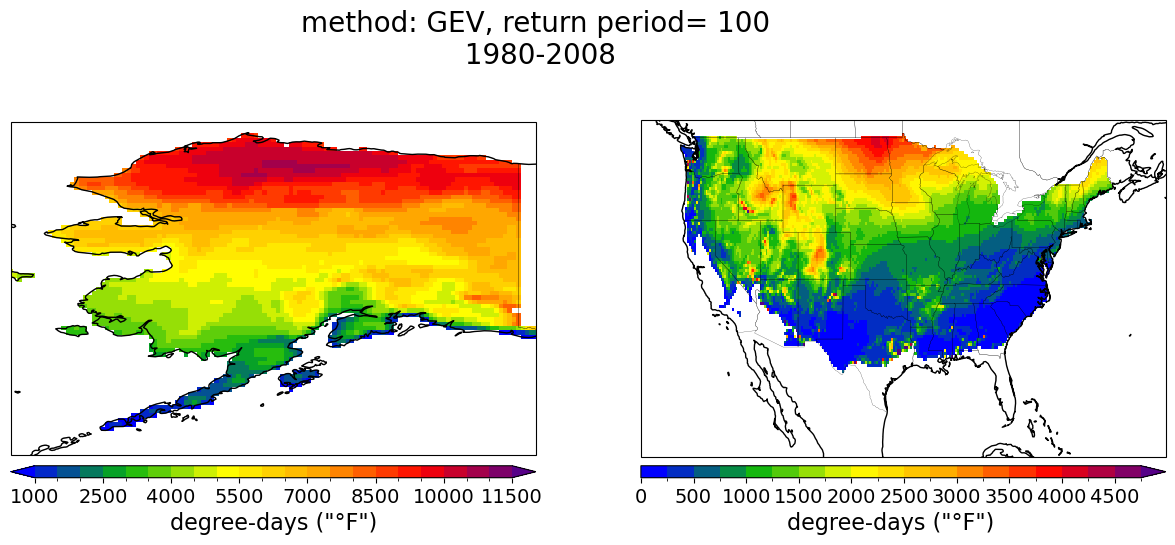

In [86]:
nperiod=100

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)
cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax[0],cmap=cmap,levels=np.arange(1000,12000,500),add_colorbar=False)
ax[0].scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.95,zorder=10)
p0 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax[0].set_extent([190,220,53,72],ccrs.PlateCarree())

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax[1],cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
ax[1].scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.95,zorder=10)
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax[1].set_extent([230,300,22,50.5],ccrs.PlateCarree())


asp = np.diff(ax[0].get_xlim())[0] / np.diff(ax[0].get_ylim())[0]
ax[1].set_aspect(asp)

for i in range(len(ax)):
  ax[i].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
  ax[i].coastlines()
  ax[i].set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}\n {yearb}-{yeare}',fontsize=20)  

Text(0.5, 0.98, 'method: GEV, return period= 100\n 1980-2008')

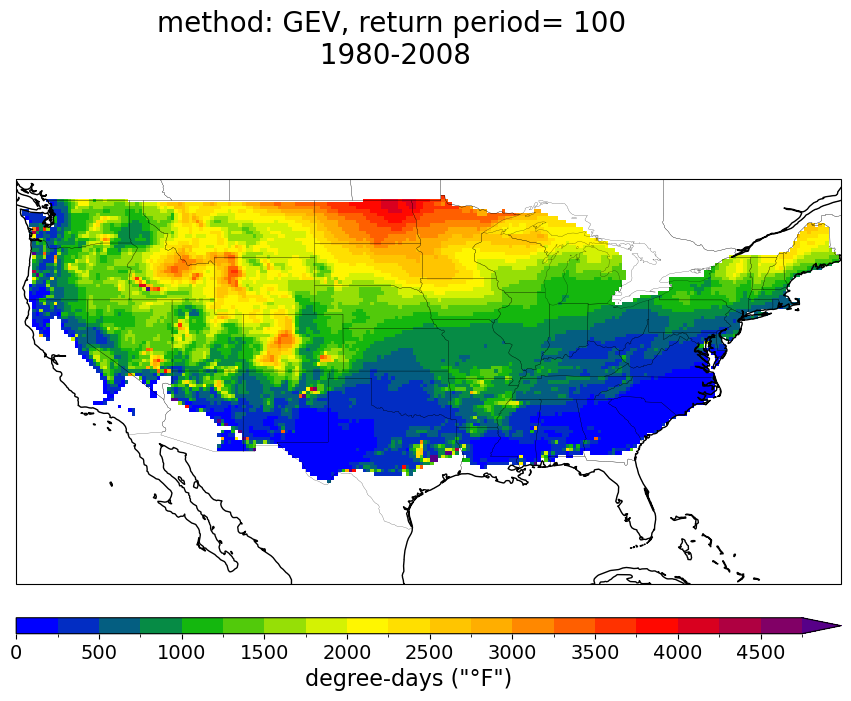

In [87]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax,cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
ax.scatter(ds.lon[idlon],ds.lat[idlat], marker='o',edgecolor='k',color='None',linewidth=0.75,zorder=10)
p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax.set_extent([235,293,22,50.5],ccrs.PlateCarree())
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
ax.coastlines()
ax.set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}\n {yearb}-{yeare}',fontsize=20)  

Text(0.5, 0.98, 'method: GEV, return period= 100\n 1980-2008')

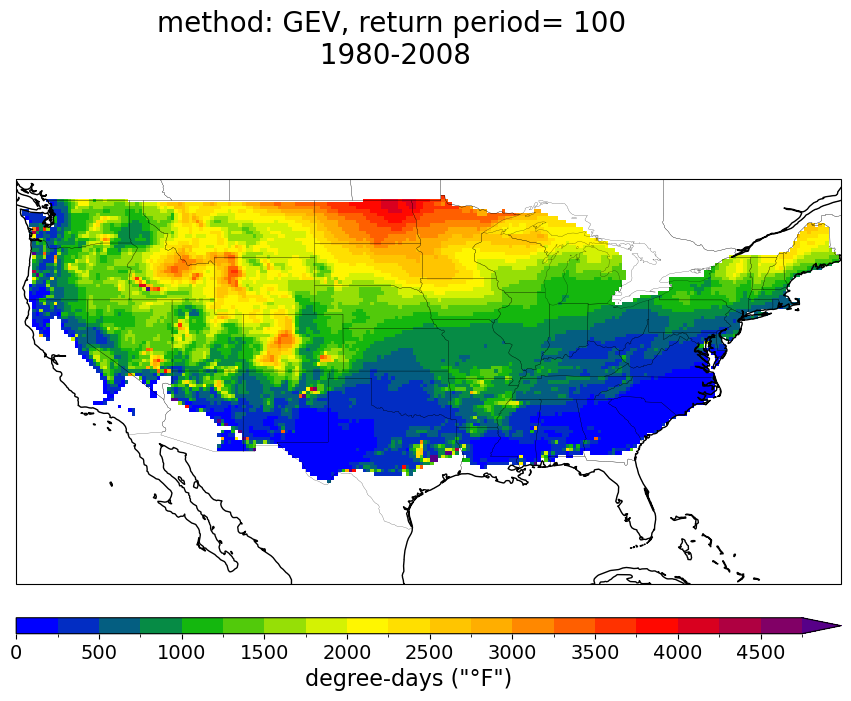

In [88]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.15, right=0.95)

cc=ds['return_afi'].sel(return_periods=nperiod).plot.pcolormesh(ax=ax,cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)

p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.2, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
ax.set_extent([235,293,22,50.5],ccrs.PlateCarree())
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
ax.coastlines()
ax.set_title('')
plt.suptitle(f'method: {method}, return period= {nperiod}\n {yearb}-{yeare}',fontsize=20)  

Text(0.5, 0.98, 'GEV parameters\n 1980-2008')

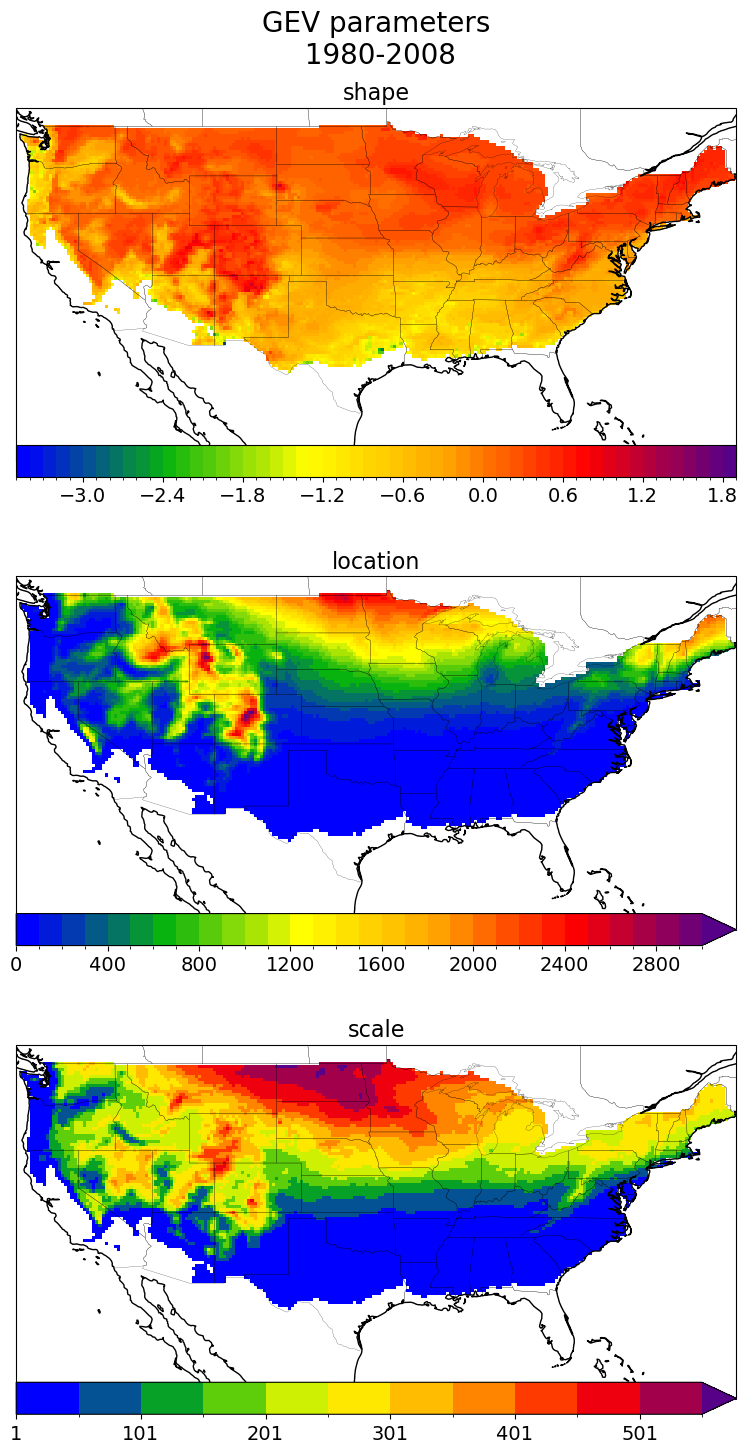

In [89]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(8,16),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.1, top=0.93,right=0.95,left=0.05,hspace=0.2)
ax=ax.flatten()
cc1=ds['shape'].plot.pcolormesh(ax=ax[0],cmap=cmap,levels=np.arange(-3.5,2,0.1),add_colorbar=False)
p0 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.09, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc1,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[0].set_title('shape',fontsize=16)
#
cc2=ds['location'].plot.pcolormesh(ax=ax[1],cmap=cmap,levels=np.arange(0,3100,100),add_colorbar=False)
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.09, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc2,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[1].set_title('location',fontsize=16)
#
cc3=ds['scale'].plot.pcolormesh(ax=ax[2],cmap=cmap,levels=np.arange(1,600,50),add_colorbar=False)
p0 = ax[2].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.09, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc3,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[2].set_title('scale',fontsize=16)
#
for ix in range(0,len(ax)):
  ax[ix].set_extent([235,293,22,50.5],ccrs.PlateCarree())
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
  ax[ix].coastlines()

plt.suptitle(f'GEV parameters\n {yearb}-{yeare}',fontsize=20)  

# READ 1950 - 1978

In [90]:

file0=f'{datadir}/afi_return.fullUSA.gev.1950_1978_KS.nc'
ds0=xr.open_dataset(file0)

In [91]:
yearb0=file0.split('.')[-2].split('_')[0]
yeare0=file0.split('.')[-2].split('_')[1]
print(yearb0,yeare0)

1950 1978


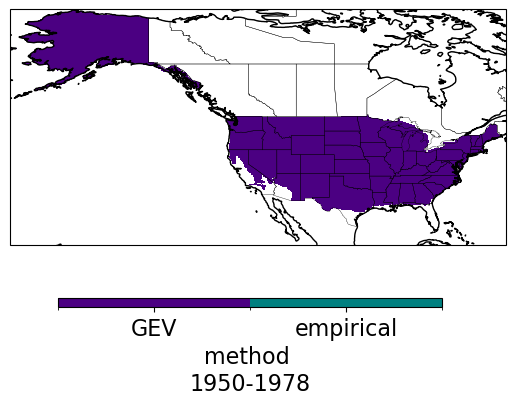

In [128]:
# choose a good projection for regional maps
levels=np.array([1,2,3])
pal_norm = colors.BoundaryNorm(np.array([1,2,3]),ncolors=3, clip = False)
cmap= colors.ListedColormap(['indigo','sienna', 'teal'])
proj=ccrs.PlateCarree()
#proj=ccrs.LambertConformal()
fig, ax = plt.subplots(nrows=1,ncols=1,subplot_kw={'projection':proj})
cc=ds0['method'].plot.pcolormesh(ax=ax,cmap = cmap, levels=levels, transform=proj,add_colorbar=False)

state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='None')
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.25)
cbar_ax = fig.add_axes([0.2, 0.12, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=cbar_ax,orientation='horizontal',ticks=[1.5,2.5])
cbar.set_ticklabels(['GEV','empirical'],fontsize=14)
cbar.set_label(label=f'method \n{yearb0}-{yeare0}',fontsize=16)
cbar.ax.tick_params(labelsize=16)
ax.set_extent([190,294,22,62])
ax.coastlines()

In [ ]:
cmap=cmaps.BlGrYeOrReVi200
proj=ccrs.PlateCarree()

Text(0.5, 0.98, 'GEV parameters\n 1950-1978')

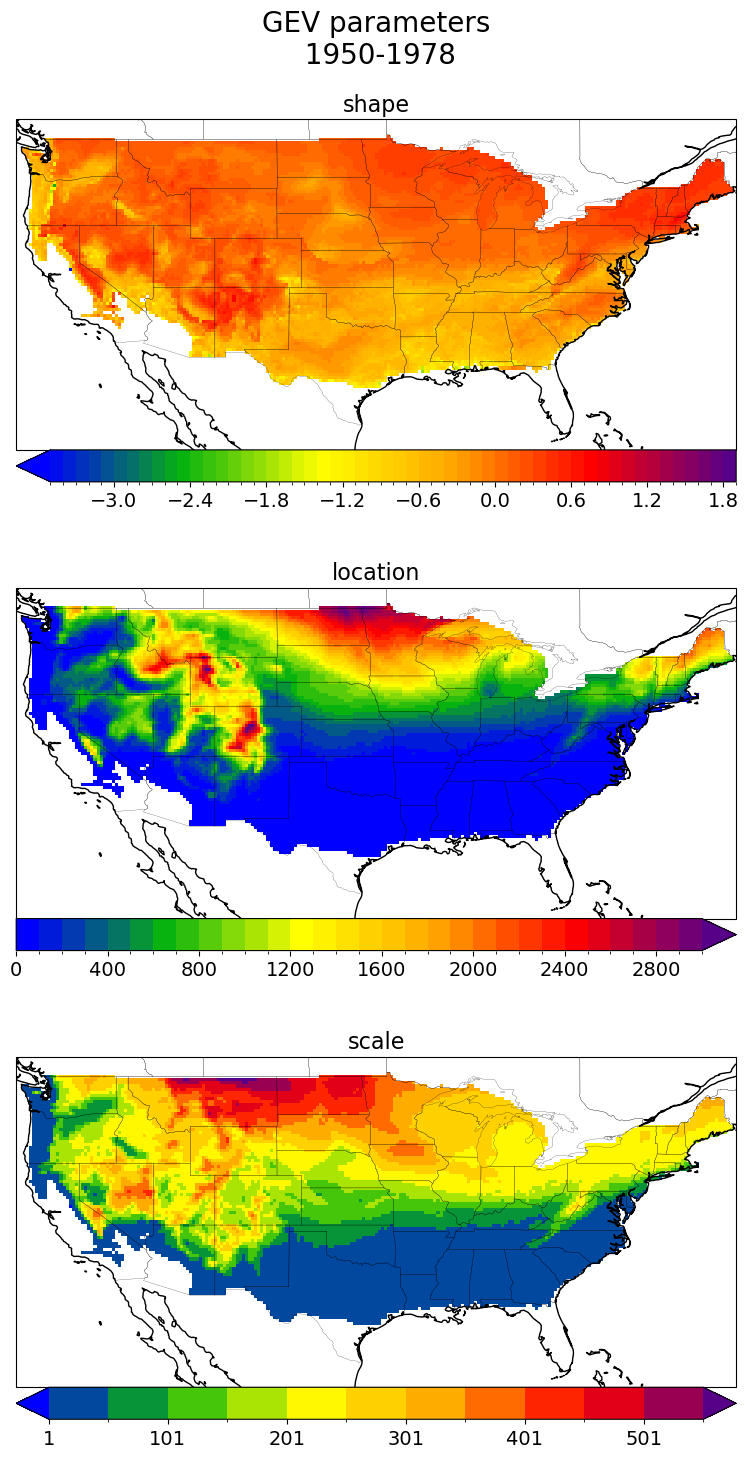

In [92]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(8,16),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.1, top=0.93,right=0.95,left=0.05,hspace=0.2)
ax=ax.flatten()
cc1=ds0['shape'].sel(lat=slice(50.5,22),lon=slice(235,293)).plot.pcolormesh(ax=ax[0],cmap=cmap,levels=np.arange(-3.5,2,0.1),add_colorbar=False)
p0 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.02, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc1,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[0].set_title('shape',fontsize=16)
#
cc2=ds0['location'].sel(lat=slice(50.5,22),lon=slice(235,293)).plot.pcolormesh(ax=ax[1],cmap=cmap,levels=np.arange(0,3100,100),add_colorbar=False)
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.02, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc2,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[1].set_title('location',fontsize=16)
#
cc3=ds0['scale'].sel(lat=slice(50.5,22),lon=slice(235,293)).plot.pcolormesh(ax=ax[2],cmap=cmap,levels=np.arange(1,600,50),add_colorbar=False)
p0 = ax[2].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.02, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc3,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[2].set_title('scale',fontsize=16)
#
for ix in range(0,len(ax)):
  #ax[ix].set_extent([235,293,22,50.5],ccrs.PlateCarree())
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
  ax[ix].coastlines()

plt.suptitle(f'GEV parameters\n {yearb0}-{yeare0}',fontsize=20)  

Text(0.5, 0.98, 'GEV parameters\n (1980-2008)-(1950-1978)')

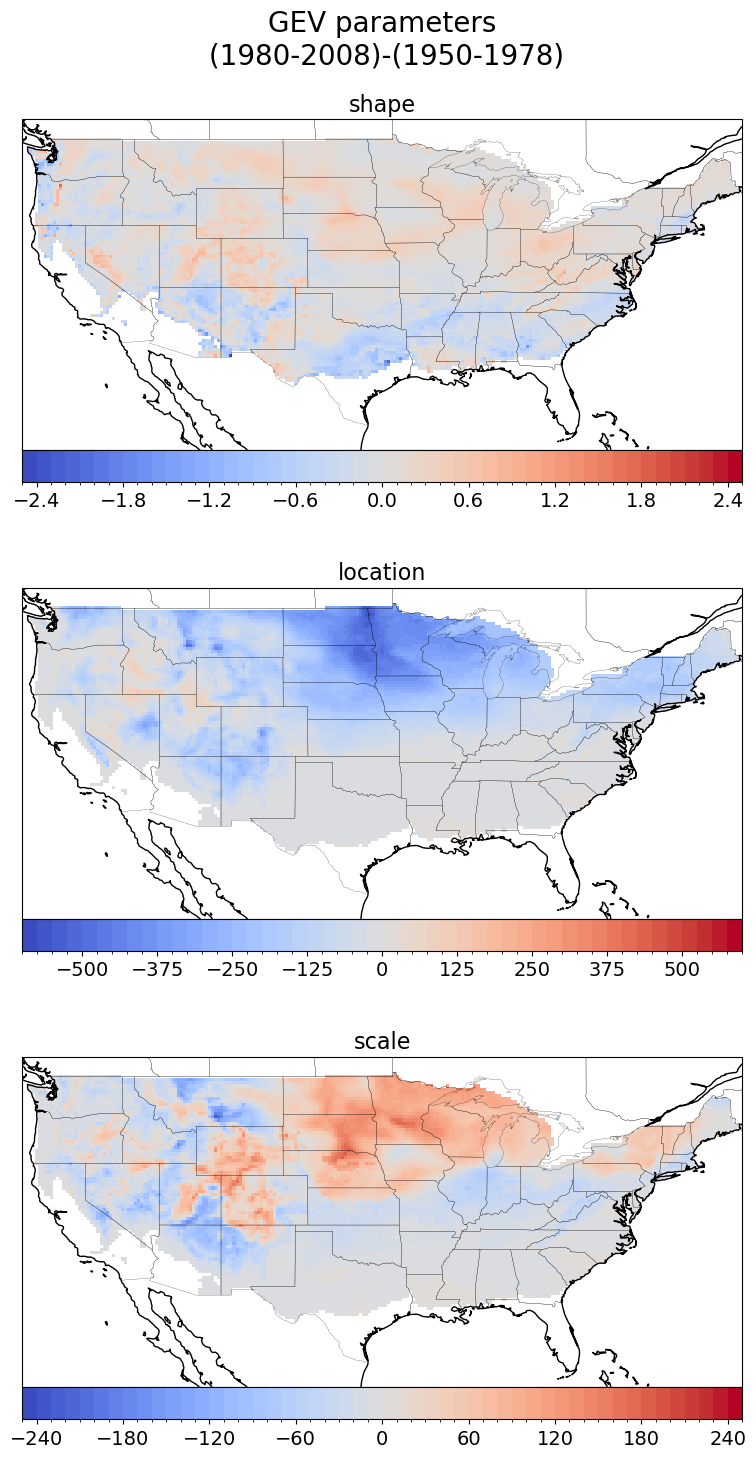

In [93]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(8,16),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.1, top=0.93,right=0.95,left=0.05,hspace=0.2)
ax=ax.flatten()
data=(ds['shape']-ds0['shape']).sel(lat=slice(50.5,22),lon=slice(235,293))
cc1=data.plot.pcolormesh(ax=ax[0],cmap='coolwarm',levels=np.arange(-2.5,2.6,0.1),add_colorbar=False)
p0 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.02, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc1,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[0].set_title('shape',fontsize=16)
#
data=(ds['location']-ds0['location']).sel(lat=slice(50.5,22),lon=slice(235,293))
cc2=data.plot.pcolormesh(ax=ax[1],cmap='coolwarm',levels=np.arange(-600,625,25),add_colorbar=False)
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.02, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc2,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[1].set_title('location',fontsize=16)
#
data=(ds['scale']-ds0['scale']).sel(lat=slice(50.5,22),lon=slice(235,293))
cc3=data.plot.pcolormesh(ax=ax[2],cmap='coolwarm',levels=np.arange(-250,260,10),add_colorbar=False)
p0 = ax[2].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.02, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc3,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[2].set_title('scale',fontsize=16)
#
for ix in range(0,len(ax)):
  #ax[ix].set_extent([235,293,22,50.5],ccrs.PlateCarree())
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
  ax[ix].coastlines()

plt.suptitle(f'GEV parameters\n ({yearb}-{yeare})-({yearb0}-{yeare0})',fontsize=20)  

In [125]:
from matplotlib import cm
from matplotlib import colors

levs=[-2500,-2000,-1500,-1000,-500,-300,-100,0,100,300,500,1000,1500,2000]
cmap = cm.get_cmap('YlOrRd_r', 8)
cmaplist = [cmap(i) for i in range(0,cmap.N)]
cmap2 = cm.get_cmap('Blues', 7)
cmaplist2 = [cmap2(i) for i in range(0,cmap2.N)]

my_cmap2 = colors.LinearSegmentedColormap.from_list('Custom cmap',\
                cmaplist+cmaplist2, len(cmaplist)+len(cmaplist2))

clevs01=[-2500,-2000,-1500,-1000,-500,-300,-100,0]
clevs19=[100,300,500,1000,1500,2000]
clevs=np.concatenate((clevs01,clevs19))
cmap=cmaps.BlGrYeOrReVi200


/tmp/ipykernel_3908111/1092899578.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('YlOrRd_r', 8)
/tmp/ipykernel_3908111/1092899578.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap('Blues', 7)


Text(0.5, 0.98, 'return period= 2')

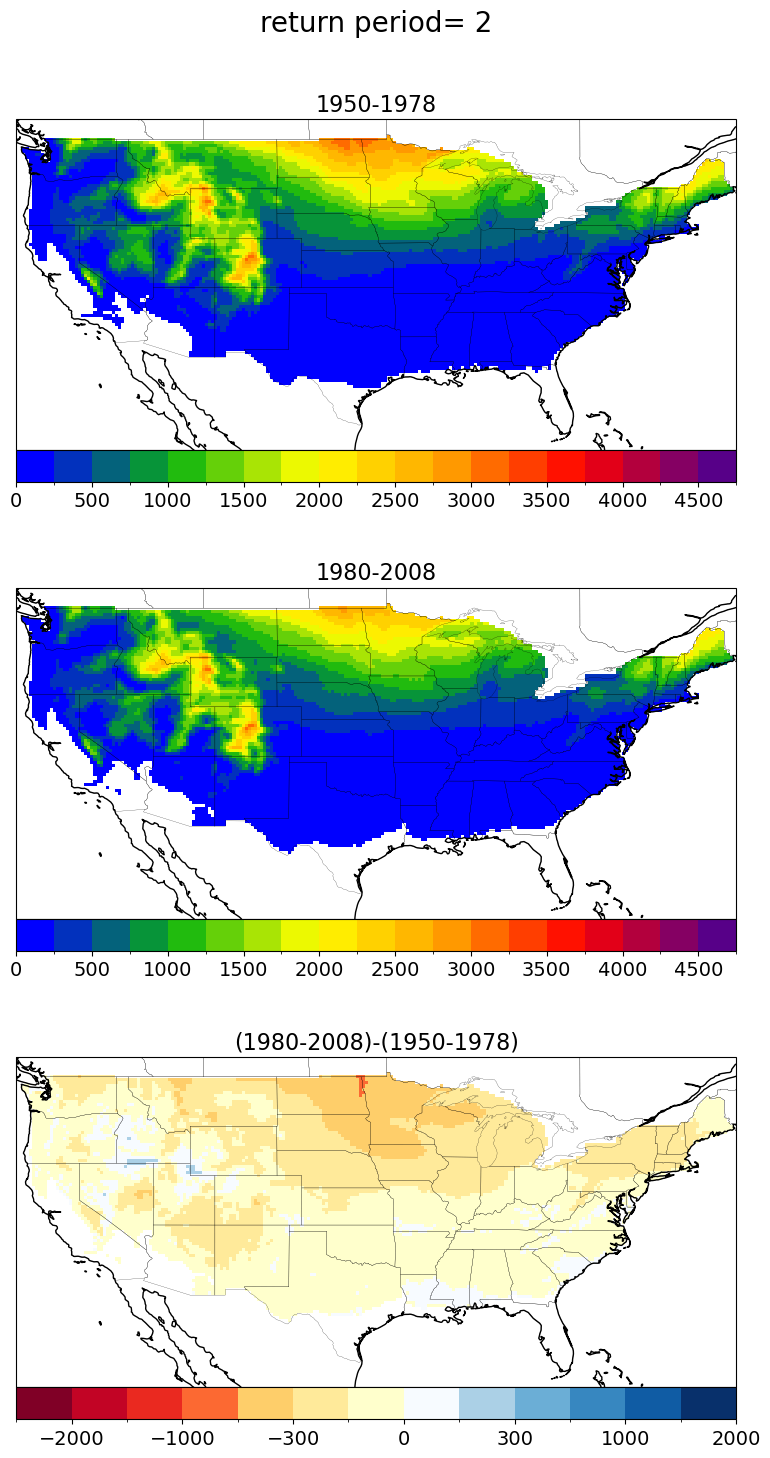

In [126]:
nperiod=2
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(8,16),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.1, top=0.93,right=0.95,left=0.05,hspace=0.2)
ax=ax.flatten()
data=(ds0['return_afi'].sel(return_periods=nperiod)).sel(lat=slice(50.5,22),lon=slice(235,293))
cc1=data.plot.pcolormesh(ax=ax[0],cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
p0 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.02, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc1,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[0].set_title(f'{yearb0}-{yeare0}',fontsize=16)
#
data=(ds['return_afi'].sel(return_periods=nperiod)).sel(lat=slice(50.5,22),lon=slice(235,293))
cc2=data.plot.pcolormesh(ax=ax[1],cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.02, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc2,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[1].set_title(f'{yearb}-{yeare}',fontsize=16)
#
data=(ds['return_afi'].sel(return_periods=nperiod)-ds0['return_afi'].sel(return_periods=nperiod)).sel(lat=slice(50.5,22),lon=slice(235,293))
cc3=data.plot.pcolormesh(ax=ax[2],cmap=my_cmap2,levels=clevs,add_colorbar=False)
p0 = ax[2].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.02, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc3,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[2].set_title(f'({yearb}-{yeare})-({yearb0}-{yeare0})',fontsize=16)
#
for ix in range(0,len(ax)):
  #ax[ix].set_extent([235,293,22,50.5],ccrs.PlateCarree())
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
  ax[ix].coastlines()

plt.suptitle(f'return period= {nperiod}',fontsize=20)  

Text(0.5, 0.98, 'return period= 100')

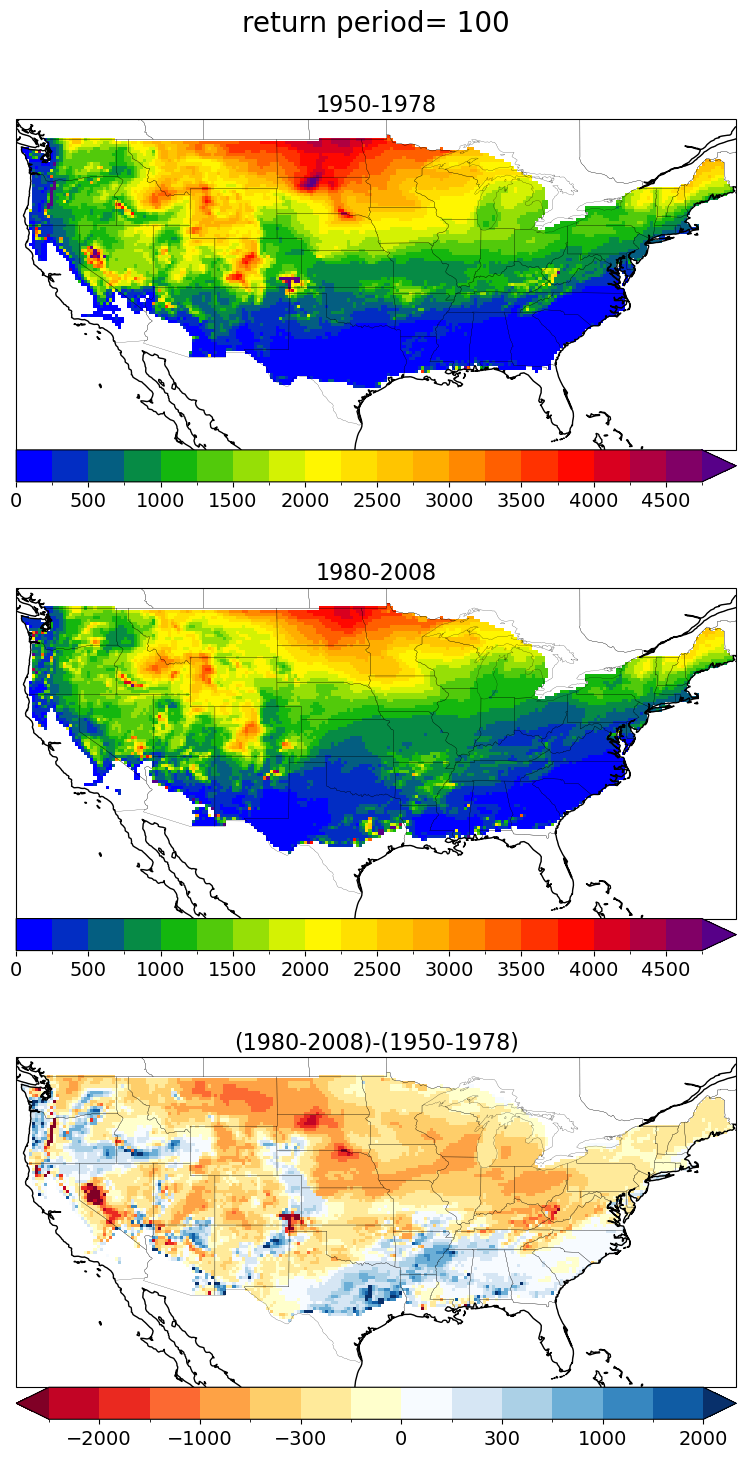

In [127]:
nperiod=100
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(8,16),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.1, top=0.93,right=0.95,left=0.05,hspace=0.2)
ax=ax.flatten()
data=(ds0['return_afi'].sel(return_periods=nperiod)).sel(lat=slice(50.5,22),lon=slice(235,293))
cc1=data.plot.pcolormesh(ax=ax[0],cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
p0 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.02, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc1,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[0].set_title(f'{yearb0}-{yeare0}',fontsize=16)
#
data=(ds['return_afi'].sel(return_periods=nperiod)).sel(lat=slice(50.5,22),lon=slice(235,293))
cc2=data.plot.pcolormesh(ax=ax[1],cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.02, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc2,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[1].set_title(f'{yearb}-{yeare}',fontsize=16)
#
data=(ds['return_afi'].sel(return_periods=nperiod)-ds0['return_afi'].sel(return_periods=nperiod)).sel(lat=slice(50.5,22),lon=slice(235,293))
cc3=data.plot.pcolormesh(ax=ax[2],cmap=my_cmap2,levels=clevs,add_colorbar=False)
p0 = ax[2].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], p0[1]-0.02, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc3,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14) 
ax[2].set_title(f'({yearb}-{yeare})-({yearb0}-{yeare0})',fontsize=16)
#
for ix in range(0,len(ax)):
  #ax[ix].set_extent([235,293,22,50.5],ccrs.PlateCarree())
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15)
  ax[ix].coastlines()

plt.suptitle(f'return period= {nperiod}',fontsize=20)  